### Modelos ETS - Error/Trend/Seasonality

Para desenvolver modelos de previsão é necessário identificar e isolar os fatores que influenciam o comportamento de uma série temporal. Daí a importância da decomposição ETS, assunto desta aula.

A decomposição de uma série temporal visa isolar componentes individuais tais como <em>erro</em>, <em>tendência</em>, e <em>sasonalidade</em> (ETS). Na aula anterior vimos como utilizar o filtro Hodrick-Prescott para separar os dados nas componentes cíclica e de tendência.

Agora veremos como fazer a decomposição dos dados sazonais utilizando um dataset que contém informações a respeito do número de passageiros em viagens aéreas nos EUA entre os anos de 1949 e 1961.

Iniciamos com a importação dos pacotes necessários.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

/home/aluno/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


Em seguida, vamos carregar nosso dataset.

In [2]:
df = pd.read_csv('airline_passengers.csv',index_col=0,parse_dates=True)
df.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


O dataset contém dados faltantes, então precisamos nos livrar dos registros que contém dados ausentes.

In [4]:
df.dropna()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


Vejamos agora o dataframe resultante.

In [5]:
df.tail()

,Thousands of Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


Próximo passo é plotar nossos dados.

Based on this chart, it looks like the trend in the earlier days is increasing at a higher rate than just linear (although it is a  bit hard to tell from this one plot).

Observando o gráfico, notamos que a tendência de aumento no número de passageiros é superior que um crescimento linear. Entretanto é difícil ter certeza a partir desse único gráfico. Vamos, então, realizar a decomposição dos componentes ETS.

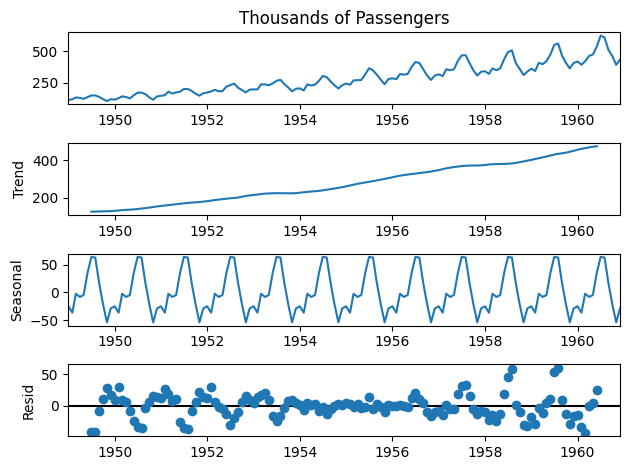

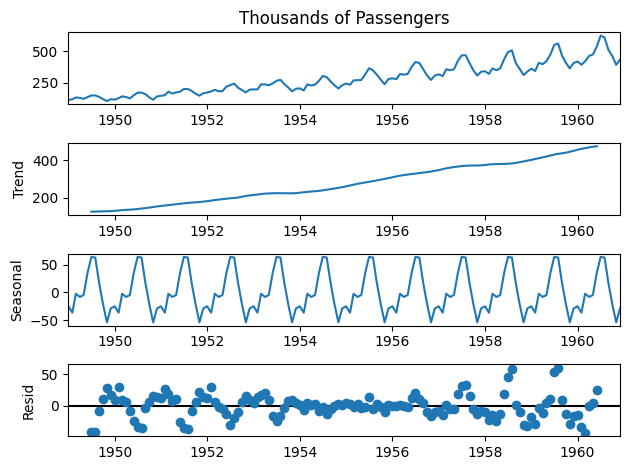

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df["Thousands of Passengers"], model="aditive")
result.plot()